In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler , LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##Preprocessing:

In [ ]:
#df.isnull().any()
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


<Axes: >

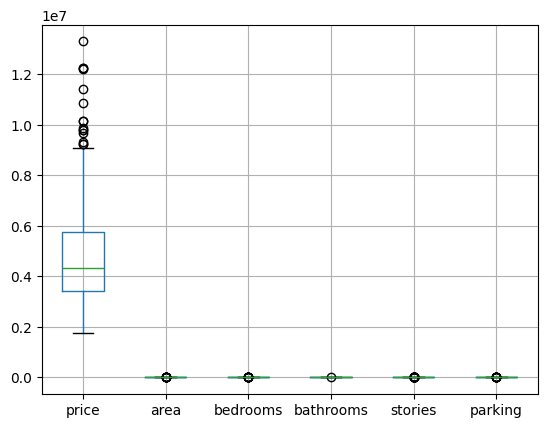

In [ ]:
df.boxplot()

In [ ]:
scaler = MinMaxScaler()
numerical_cols = ['price', 'area','bedrooms','bathrooms','stories','parking']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

scaler_no_price = MinMaxScaler()
numerical_cols_no_price = ['area','bedrooms','bathrooms','stories','parking']
df[numerical_cols_no_price] = scaler_no_price.fit_transform(df[numerical_cols_no_price])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,0.666667,yes,furnished
1,0.909091,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,1.000000,no,furnished
2,0.909091,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished
3,0.906061,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished
4,0.836364,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished


In [ ]:
#print(np.mean(df['price']))
numerical_cols = ['price', 'area','bedrooms','bathrooms','stories','parking']
df[numerical_cols].describe()
df[numerical_cols].corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


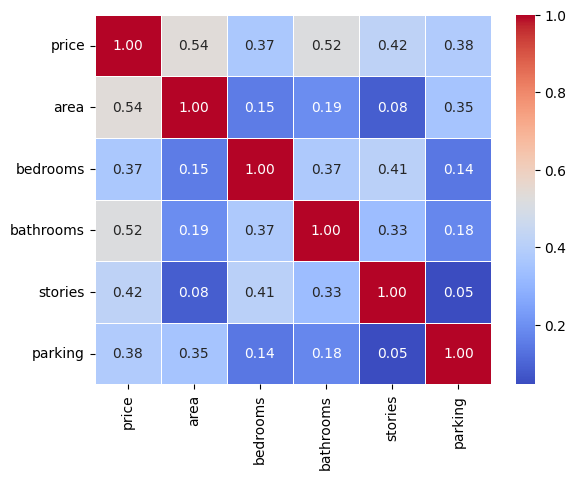

In [ ]:
corr_mat = df[numerical_cols].corr()
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm', fmt= ".2f", linewidths= 0.5 )
plt.show()

In [ ]:
df['bedroom_per_floor'] = df['bedrooms']/df['stories']
df['bathroom_per_floor'] = df['bathrooms']/df['stories']
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedroom_per_floor,bathroom_per_floor
0,1.000000,0.396564,0.6,0.333333,0.666667,yes,no,no,no,yes,0.666667,yes,furnished,0.9,0.5
1,0.909091,0.502405,0.6,1.000000,1.000000,yes,no,no,no,yes,1.000000,no,furnished,0.6,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,yes,no,yes,no,no,0.666667,yes,semi-furnished,1.2,1.0
3,0.906061,0.402062,0.6,0.333333,0.333333,yes,no,yes,no,yes,1.000000,yes,furnished,1.8,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,yes,yes,yes,no,yes,0.666667,no,furnished,1.8,0.0


In [ ]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

x = df.drop("price", axis=1)
y = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state = 42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.01529766564185466
R-squared: 0.596257101727442


In [ ]:
new_house = pd.DataFrame([{
    'area': 2500,
    'bedrooms': 4,
    'bathrooms': 3,
    'stories': 2,
    'mainroad': 'yes',
    'guestroom': 'no',
    'basement': 'yes',
    'hotwaterheating': 'no',
    'airconditioning': 'yes',
    'parking': 2,
    'prefarea': 'yes',
    'furnishingstatus': 'furnished',
}])

for col in categorical_cols:
    le = label_encoders[col]
    new_house[col] = le.transform(new_house[col])

numerical_cols_no_price = ['area','bedrooms','bathrooms','stories','parking']
new_house[numerical_cols_no_price] = scaler_no_price.transform(new_house[numerical_cols_no_price])
new_house['bedroom_per_floor'] = new_house['bedrooms']/new_house['stories']
new_house['bathroom_per_floor'] = new_house['bathrooms']/new_house['stories']
new_house.replace([np.inf, -np.inf], np.nan, inplace=True)
new_house.fillna(0, inplace=True)
new_house = new_house[x_train.columns]
predicted_price = model.predict(new_house)

print("Predicted house price:", predicted_price[0])

Predicted house price: 0.8607272727272718


In [ ]:
dummy_df = pd.DataFrame(np.zeros((1, len(numerical_cols))), columns=numerical_cols)
dummy_df['price'] = predicted_price[0]
original_price_df = scaler.inverse_transform(dummy_df)
original_price = original_price_df[0][0]
print("Predicted house price in original units:", original_price)

Predicted house price in original units: 11691399.999999989
